*First compiled: September 14, 2017.*

# Exports for comparisons with other algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc
sc.settings.verbosity = 1                          # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)              # low dots per inch yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+35.g563ceec on 2017-10-25 08:16.


## Export data with a continuous tree and clusters

The data has been saved in [minimal_examples.ipynb](minimal_examples.ipynb), where you can find more information.

reading ./write/krumsiek11_blobs.h5


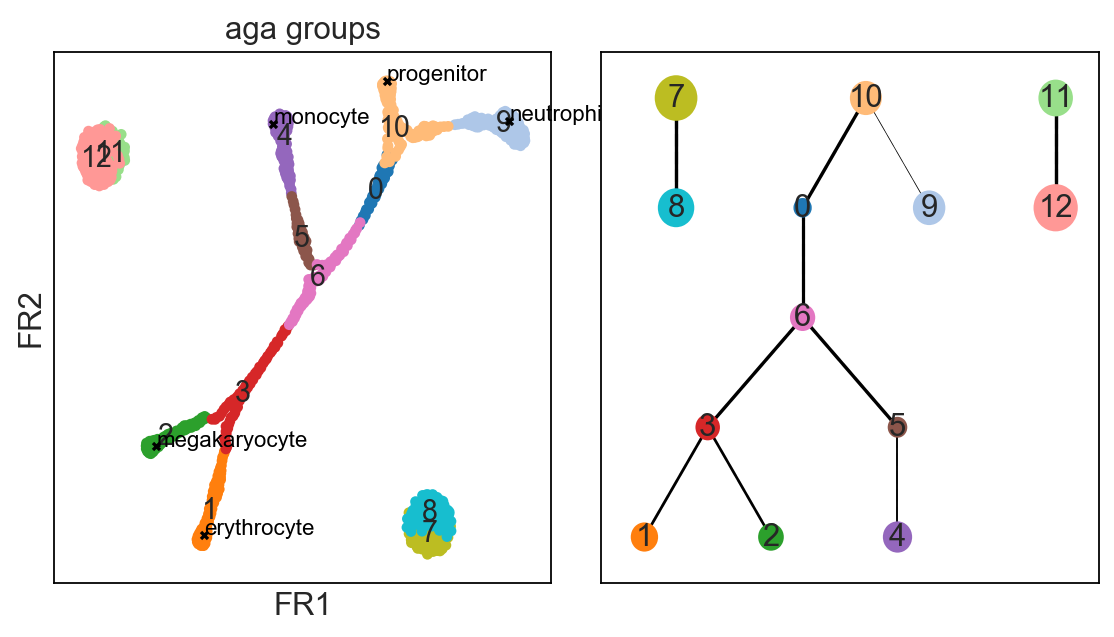

In [3]:
adata = sc.read('krumsiek11_blobs')
ax = sc.pl.aga(adata, basis='draw_graph_fr', layout='rt', root=[7, 10, 11],
               color='aga_groups', groups_graph='aga_groups',)

Actually do the exports.

In [4]:
# For Monocle 2, simply export the whole AnnData object.
sc.write('./comparisons/data/krumsiek11_blobs.csv', adata)
# For Eclair, we need it in tab-separated format.
df = pd.DataFrame(adata.X)
df.to_csv('./comparisons/eclair/X_krumsiek11_blobs.txt', sep='\t')
# For StemID, we need to shift it to remove negative values.
X_shifted = adata.X - np.min(adata.X)
df = pd.DataFrame(X_shifted)
df.to_csv('./comparisons/stemID/X_krumsiek11_blobs_shifted.csv')

writing csv files to ./comparisons/data/krumsiek11_blobs/


Just a brief check that the shifted matrix yields the same results.

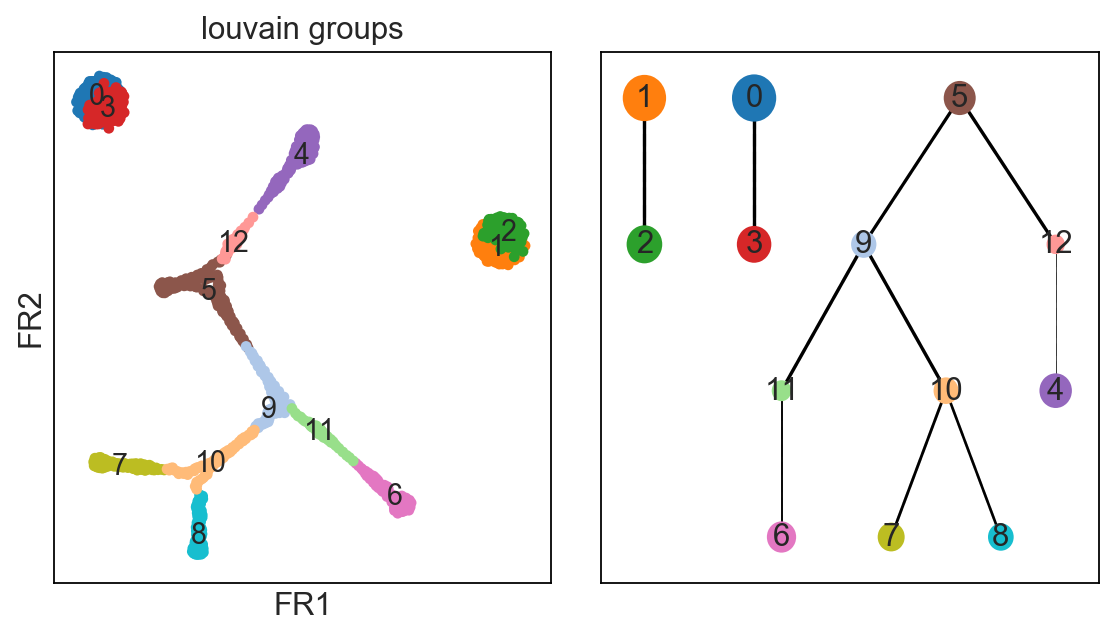

In [7]:
adata = sc.AnnData(X_shifted)
sc.tl.draw_graph(adata)
sc.tl.aga(adata, resolution=2.5)
ax = sc.pl.aga(adata, basis='draw_graph_fr', layout='rt', root=['5', '0', '1'])

## Export a simple tree

In [8]:
adata = sc.datasets.krumsiek11()
# For Eclair, we need it in tab-separeted format.
pd.DataFrame(adata.X).to_csv('./comparisons/eclair/X_krumsiek11.txt', sep='\t')
sc.pp.scale(adata)
pd.DataFrame(adata.X).to_csv('./comparisons/eclair/X_krumsiek11_scaled.txt', sep='\t')
# For StemID, we need to shift it to remove negative values.
X_shifted = adata.X - np.min(adata.X)
df = pd.DataFrame(X_shifted)
df.to_csv('./comparisons/stemID/X_krumsiek11_shifted.csv')

reading ./write/data/Users/alexwolf/hholtz/01_projects/1512_scanpy/scanpy/scanpy/datasets/krumsiek11.h5


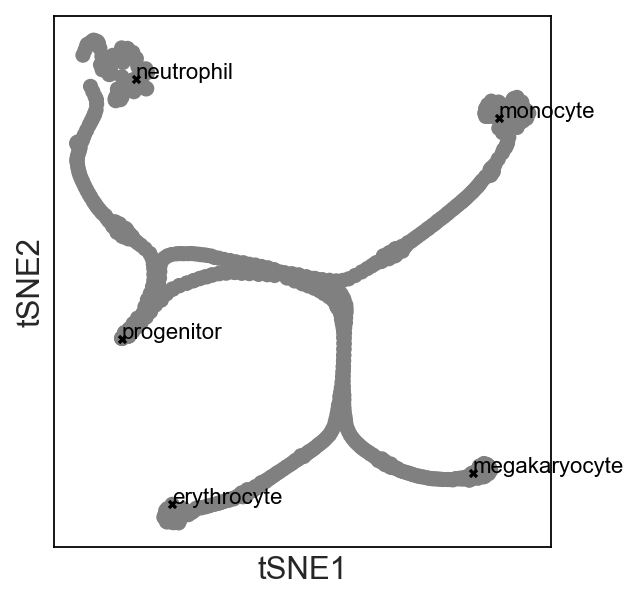

In [9]:
sc.tl.tsne(adata)
ax = sc.pl.tsne(adata)

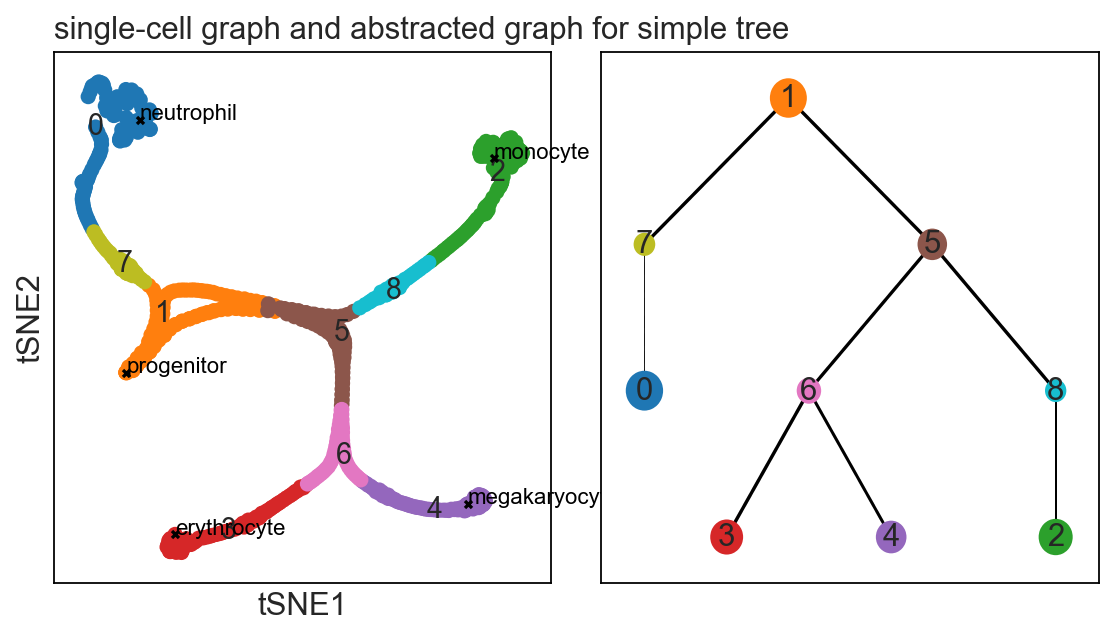

In [10]:
sc.tl.aga(adata)
axs = sc.pl.aga(adata, layout='rt', root='1', show=False, title='')
axs[0].set_title('single-cell graph and abstracted graph for simple tree', loc='left')
pl.savefig('./figures/aga_simple_tree.png')
pl.show()

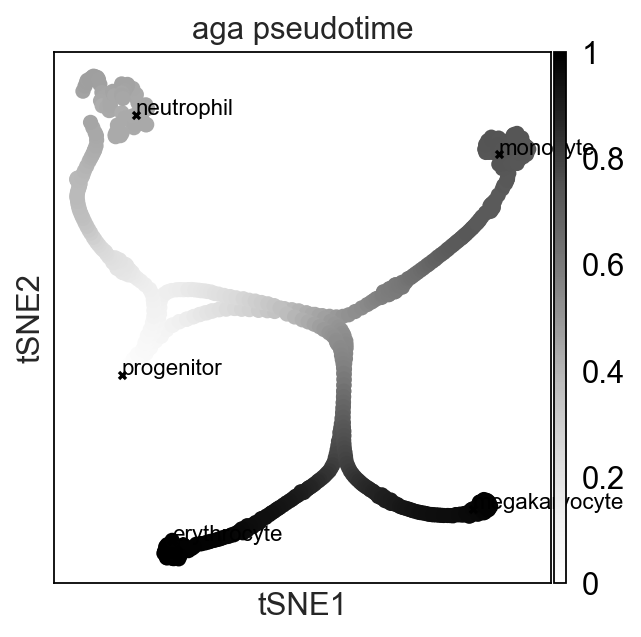

In [11]:
axs = sc.pl.tsne(adata, color='aga_pseudotime')

In [12]:
sc.write('./comparisons/data/krumsiek11.csv', adata)

writing csv files to ./comparisons/data/krumsiek11/
